# Customer Segmentation Analysis

# Download and Load the DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression  # for Linear regression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv("M:\Downloads\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
data.shape

(200, 5)

# Perform Below Visualizations


# Univariate Analysis

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

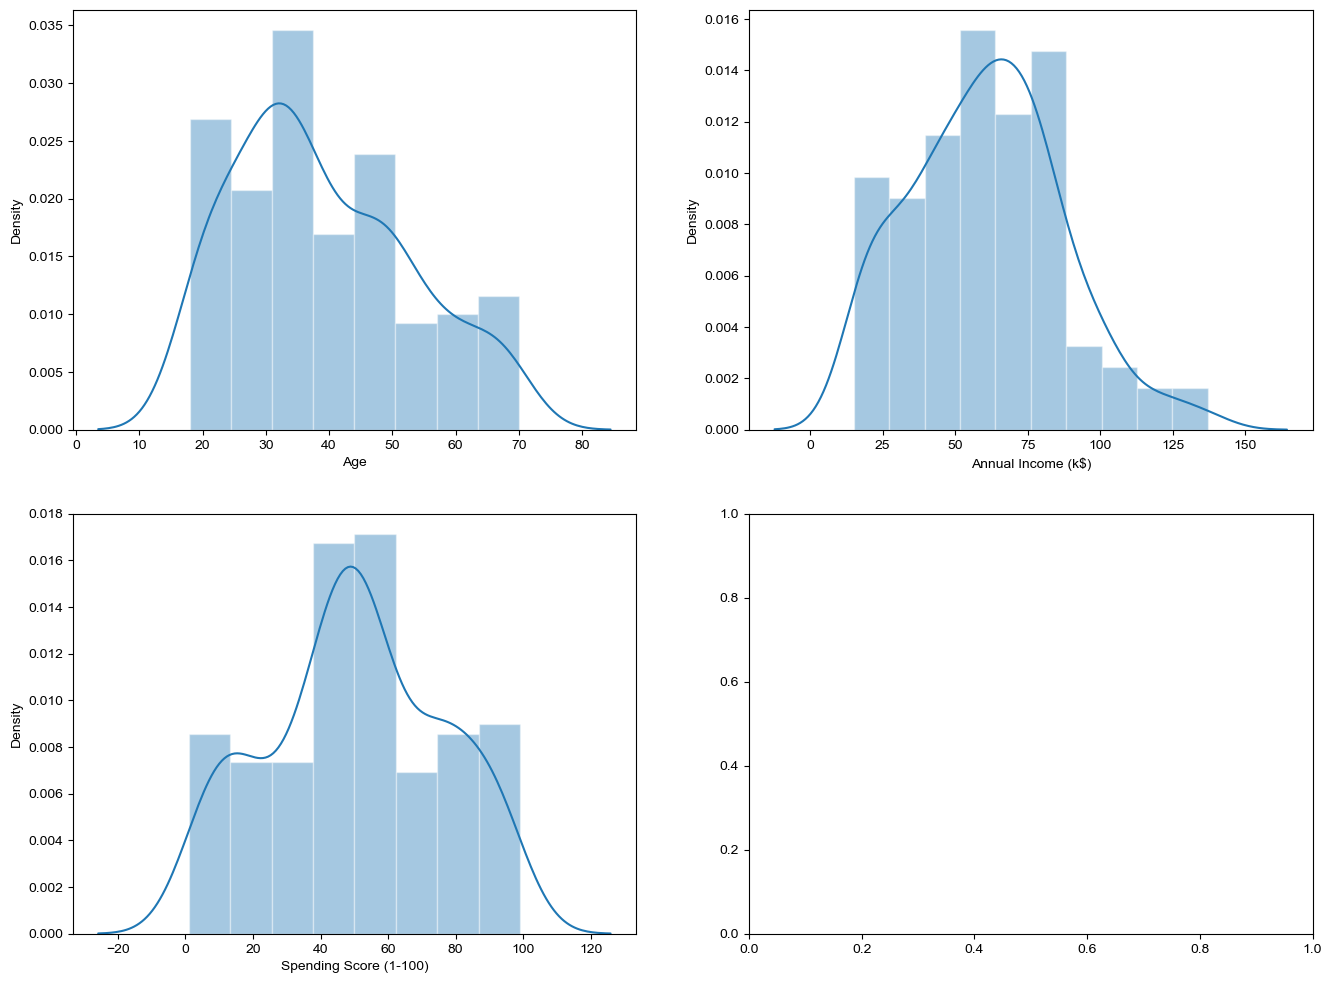

In [5]:
fig, ax = plt.subplots(figsize=(16,12), ncols=2, nrows=2)
sns.set_style("dark")
sns.set_context("notebook")

sns.distplot(data['Age'],kde =True, ax=ax[0][0])
sns.distplot(data['Annual Income (k$)'],   kde =True, ax=ax[0][1])
sns.distplot(data['Spending Score (1-100)'],  kde =True, ax=ax[1][0])

<AxesSubplot:xlabel='Gender', ylabel='count'>

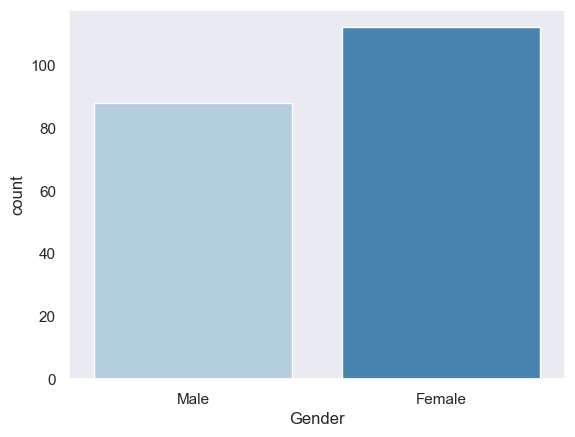

In [6]:
sns.countplot(x=data["Gender"],palette='Blues')

# Bi-variate Analysis

In [7]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

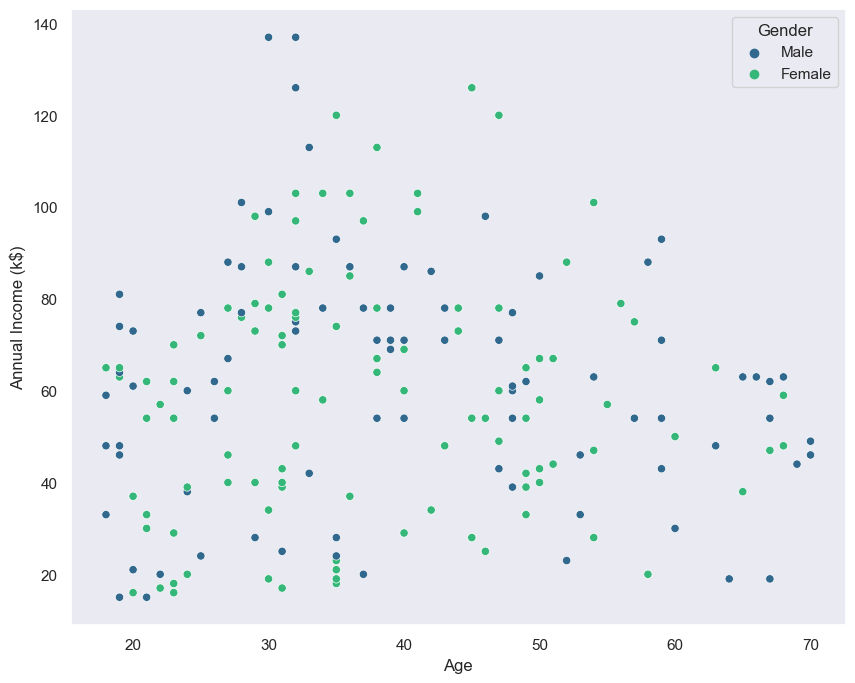

In [8]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x="Age", y="Annual Income (k$)", hue="Gender",palette='viridis')

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

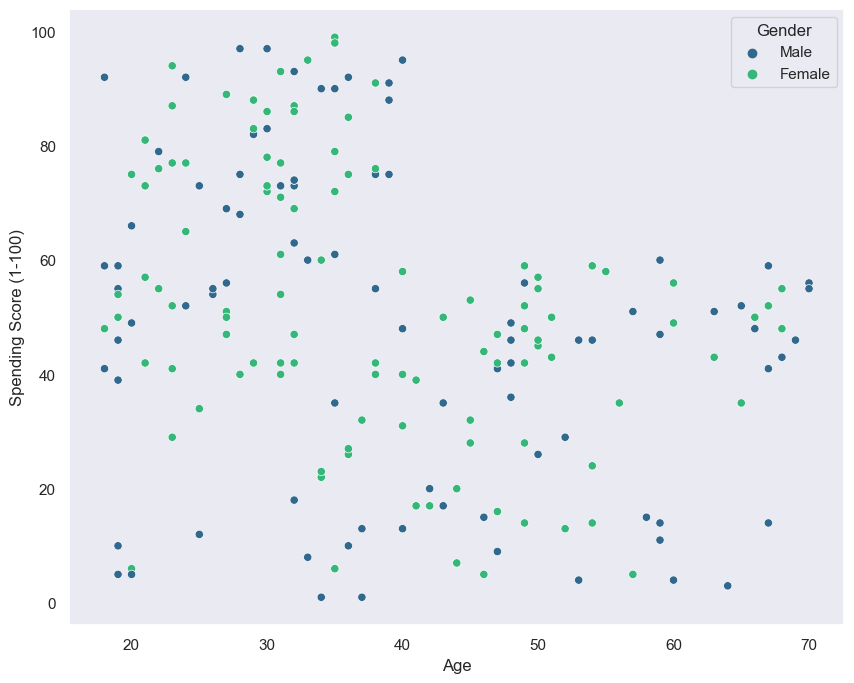

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x="Age", y="Spending Score (1-100)", hue="Gender",palette='viridis')

# Multi-Variate Analysis

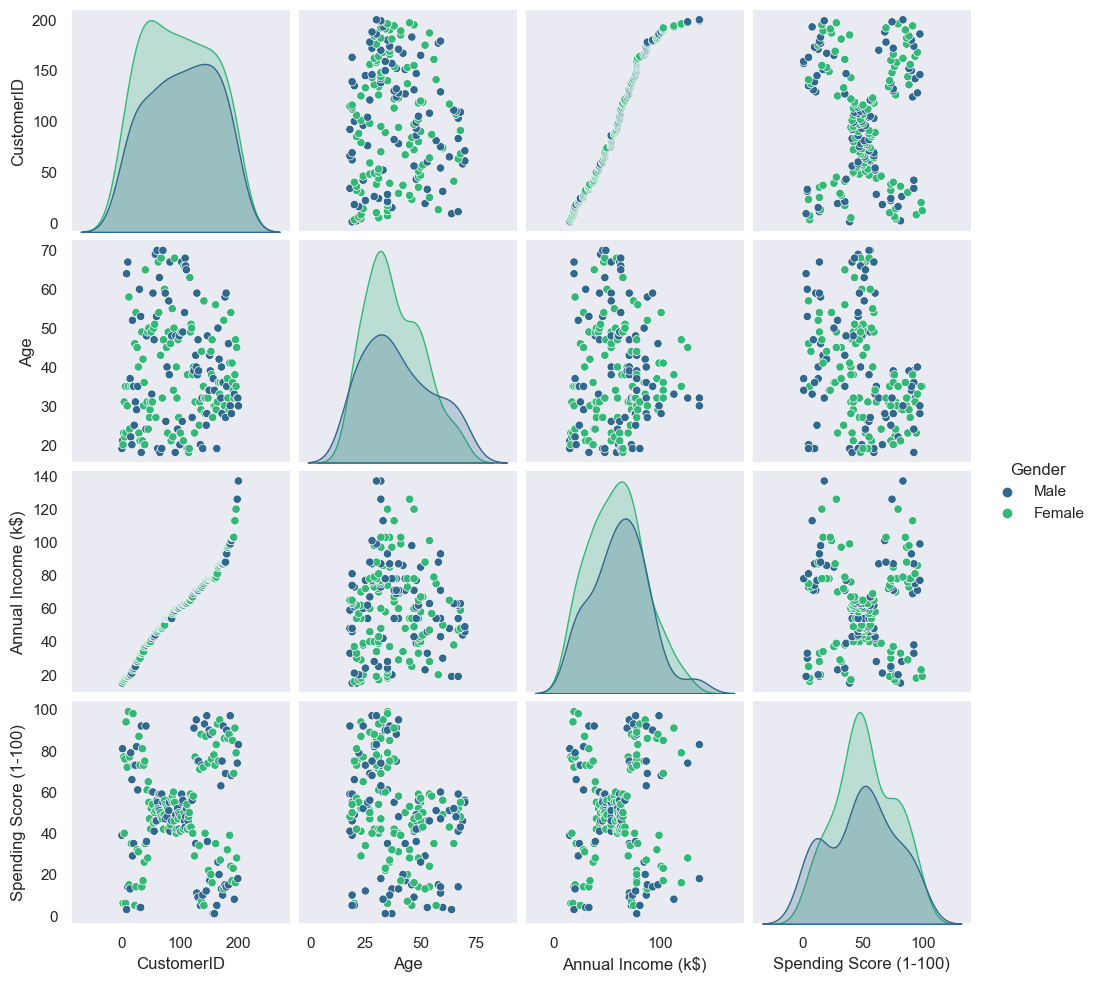

In [10]:
sns.pairplot(data,hue='Gender',palette="viridis")
plt.show()

# Descriptive statistics

In [11]:
data.describe(include='all')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [12]:
data.skew()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_37684\1188251951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

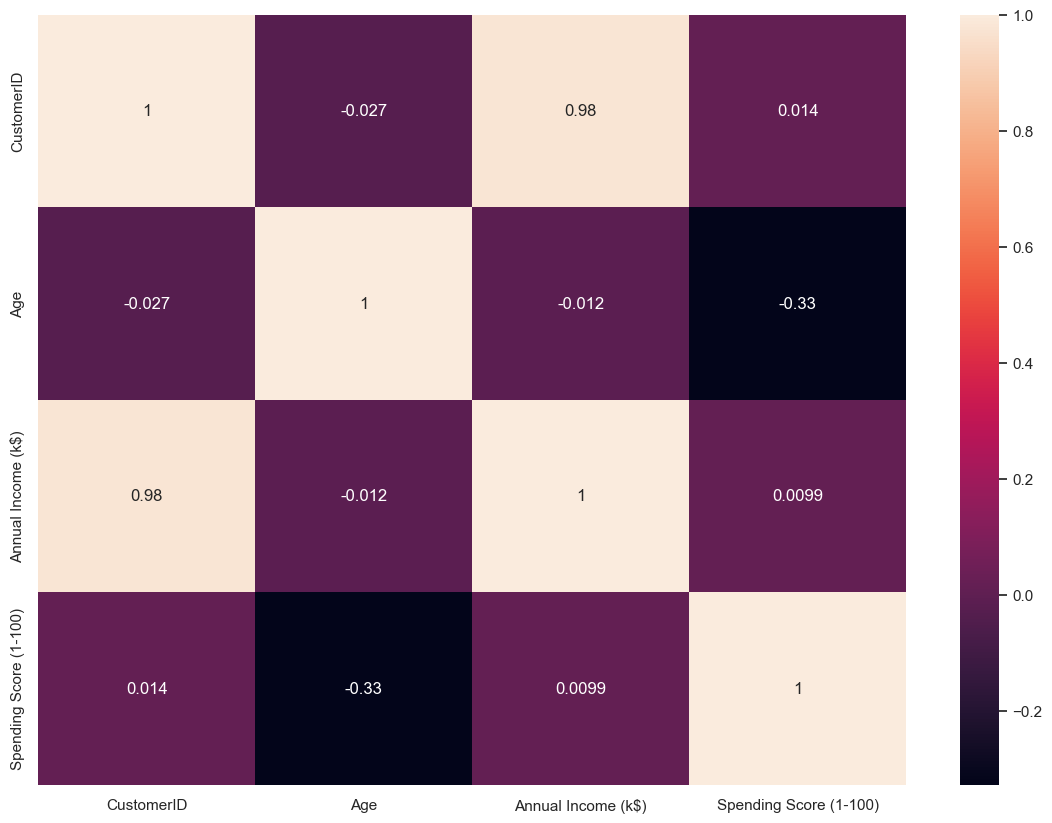

In [13]:
plt.figure(figsize = (14,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Check for Missing values and deal with them

In [14]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<AxesSubplot:>

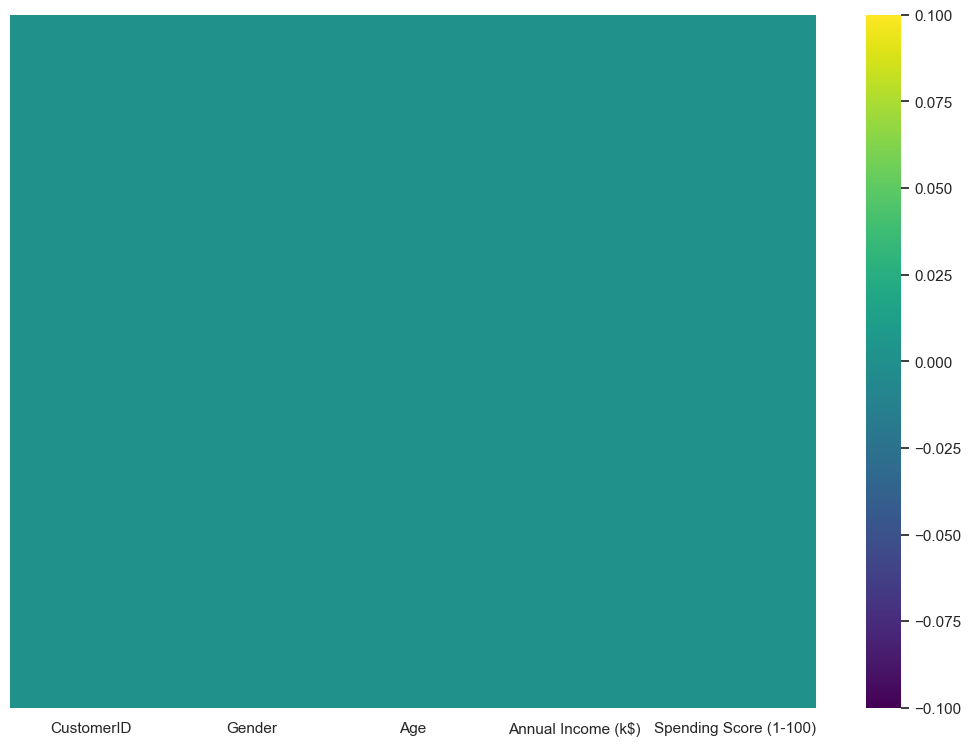

In [15]:
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

# Find the outliers and replace the outliers

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual Income (k$)'>

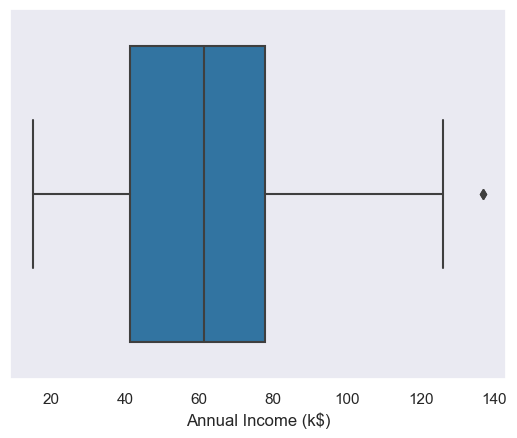

In [16]:
sns.boxplot(data['Annual Income (k$)'])

In [17]:
#handling outliers: InterQuartile Range(IQR)
Q3=np.percentile(data["Annual Income (k$)"],75,interpolation='midpoint')
Q1=np.percentile(data["Annual Income (k$)"],25,interpolation='midpoint')
IQR=Q3-Q1
print("Q1: ", Q1)
print("Q3:", Q3)
print("IQR: ", IQR)

Q1:  41.0
Q3: 78.0
IQR:  37.0


In [18]:
upperOutlayers=Q3+1.5*IQR
lowerOutlayers=Q1-1.5*IQR
print(upperOutlayers)
print(lowerOutlayers)

133.5
-14.5


In [19]:
data.drop(np.where(data["Annual Income (k$)"]>=upperOutlayers)[0],inplace=True)
data.drop(np.where(data["Annual Income (k$)"]<=lowerOutlayers)[0],inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending Score (1-100)'>

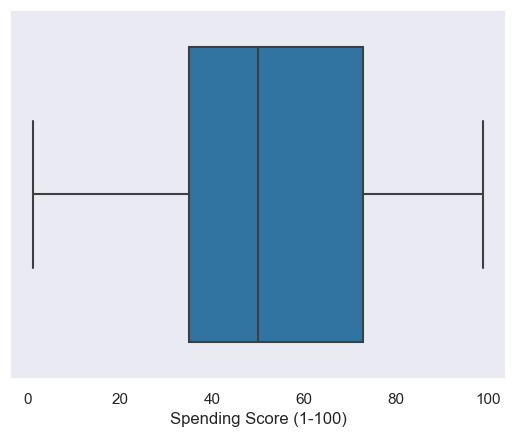

In [20]:
#find outliers-Spending Score (1-100)
sns.boxplot(data['Spending Score (1-100)'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

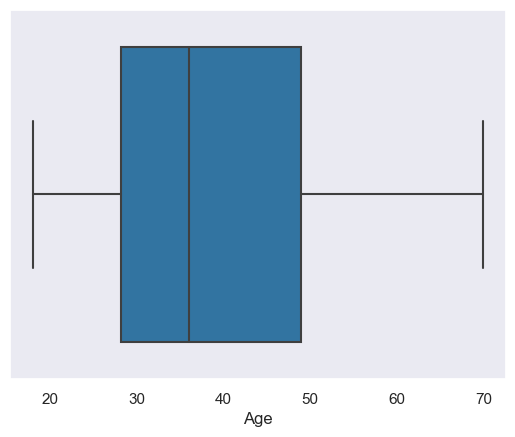

In [21]:
sns.boxplot(data['Age'])

# Check for Categorical columns and perform encoding

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              198 non-null    int64 
 1   Gender                  198 non-null    object
 2   Age                     198 non-null    int64 
 3   Annual Income (k$)      198 non-null    int64 
 4   Spending Score (1-100)  198 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
label_encoder=preprocessing.LabelEncoder()

data['Gender']= label_encoder.fit_transform(data['Gender'])

# Scaling the data

In [24]:
X = data.drop("Age",axis=1)
Y = data['Age']

In [25]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[-1.72332506  1.1411948  -1.77917141 -0.43598941]
 [-1.70582937  1.1411948  -1.77917141  1.19941337]
 [-1.68833368 -0.87627458 -1.73944701 -1.72094874]
 [-1.670838   -0.87627458 -1.73944701  1.04366072]
 [-1.65334231 -0.87627458 -1.69972262 -0.39705125]
 [-1.63584663 -0.87627458 -1.69972262  1.00472256]
 [-1.61835094 -0.87627458 -1.65999822 -1.72094874]
 [-1.60085525 -0.87627458 -1.65999822  1.70560947]
 [-1.58335957  1.1411948  -1.62027383 -1.83776323]
 [-1.56586388 -0.87627458 -1.62027383  0.84896992]
 [-1.5483682   1.1411948  -1.62027383 -1.40944345]
 [-1.53087251 -0.87627458 -1.62027383  1.90030028]
 [-1.51337683 -0.87627458 -1.58054943 -1.37050529]
 [-1.49588114 -0.87627458 -1.58054943  1.04366072]
 [-1.47838545  1.1411948  -1.58054943 -1.44838161]
 [-1.46088977  1.1411948  -1.58054943  1.12153705]
 [-1.44339408 -0.87627458 -1.54082504 -0.59174206]
 [-1.4258984   1.1411948  -1.54082504  0.61534095]
 [-1.40840271  1.1411948  -1.46137625 -0.82537103]
 [-1.39090702 -0.87627458 -1.46

# Clustering Algorithm

In [26]:
x = data.iloc[:, [3, 4]].values

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


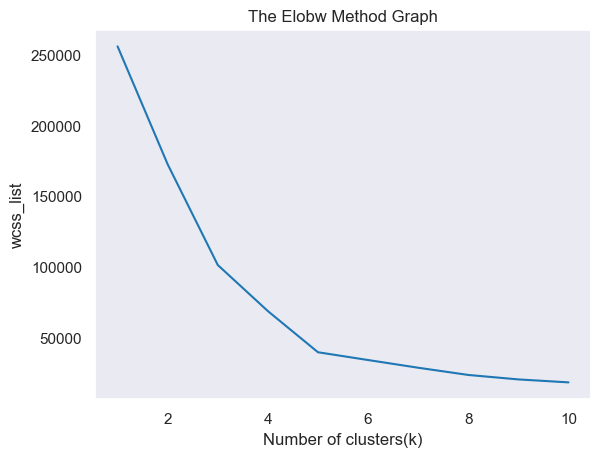

In [27]:
from sklearn.cluster import KMeans  
wcss_list= []   
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [28]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

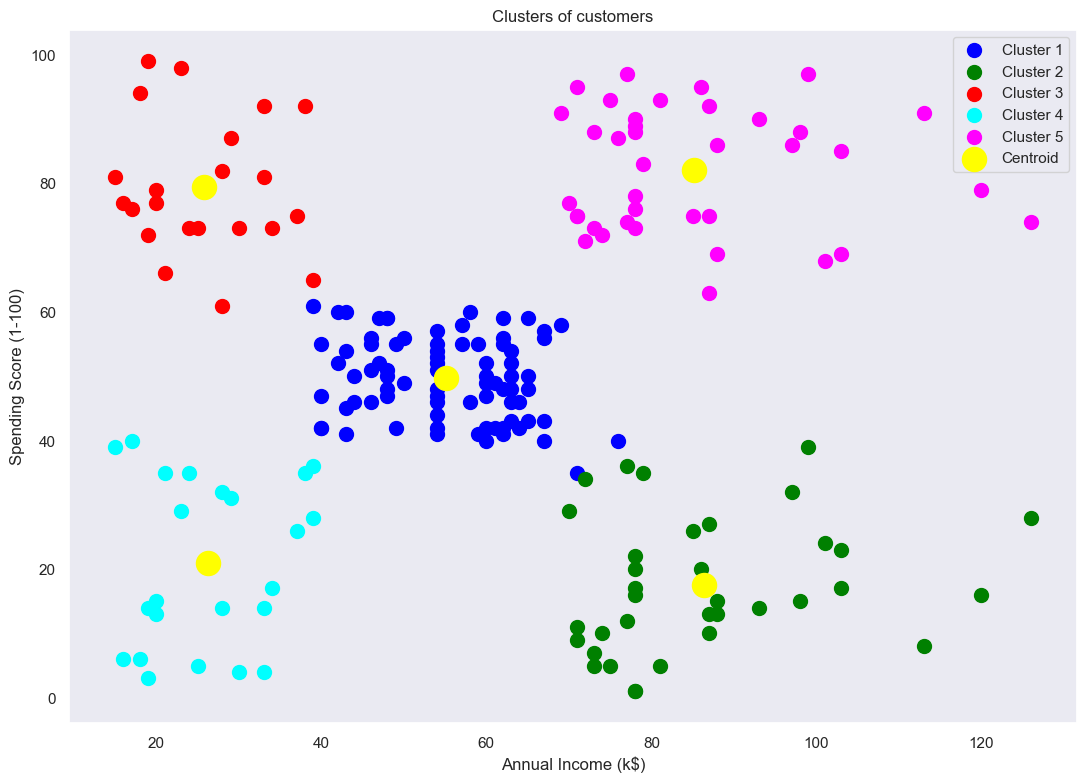

In [29]:
plt.subplots(figsize=(13, 9))
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()

# Split the data into dependent and independent variables


In [30]:
y=data['Age']
y.head()

0    19
1    21
2    20
3    23
4    31
Name: Age, dtype: int64

In [31]:
x=data.drop(columns=['Age'],axis=1)

x.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
0,1,1,15,39
1,2,1,15,81
2,3,0,16,6
3,4,0,16,77
4,5,0,17,40


In [32]:
data=pd.get_dummies(data,columns=['Age'])

data.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,...,Age_59,Age_60,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70
0,1,1,15,39,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,15,81,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,16,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,16,77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,17,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#encoding 
data = pd.get_dummies(data, drop_first=True)
data.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),Age_18,Age_19,Age_20,Age_21,Age_22,Age_23,...,Age_59,Age_60,Age_63,Age_64,Age_65,Age_66,Age_67,Age_68,Age_69,Age_70
0,1,1,15,39,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,15,81,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,16,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,16,77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,17,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split the data into training and testing

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape

(158, 4)

In [35]:
x_test.shape

(40, 4)

In [36]:
y_train.shape,y_test.shape

((158,), (40,))

# Build, test, train the Model

# DecisionTreeClassifier

In [37]:
from sklearn.tree import DecisionTreeClassifier
#initializing the DT

model=DecisionTreeClassifier()

In [38]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
y_predict=model.predict(x_test)
print(y_predict)

[35 40 67 36 32 21 30 63 37 37 19 70 27 49 68 24 24 47 20 50 20 32 31 29
 57 38 32 32 20 36 35 32 47 49 37 45 68 20 68 40]


# Model Evaluation

In [40]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [41]:
print(confusion_matrix(y_test,y_predict))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [42]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         3
          31       0.00      0.00      0.00         2
          32       0.20      1.00      0.33         1
          35       0.50      1.00      0.67         1
          36       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         0
          38       0.00      0.00      0.00         0
          39       0.00    

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\

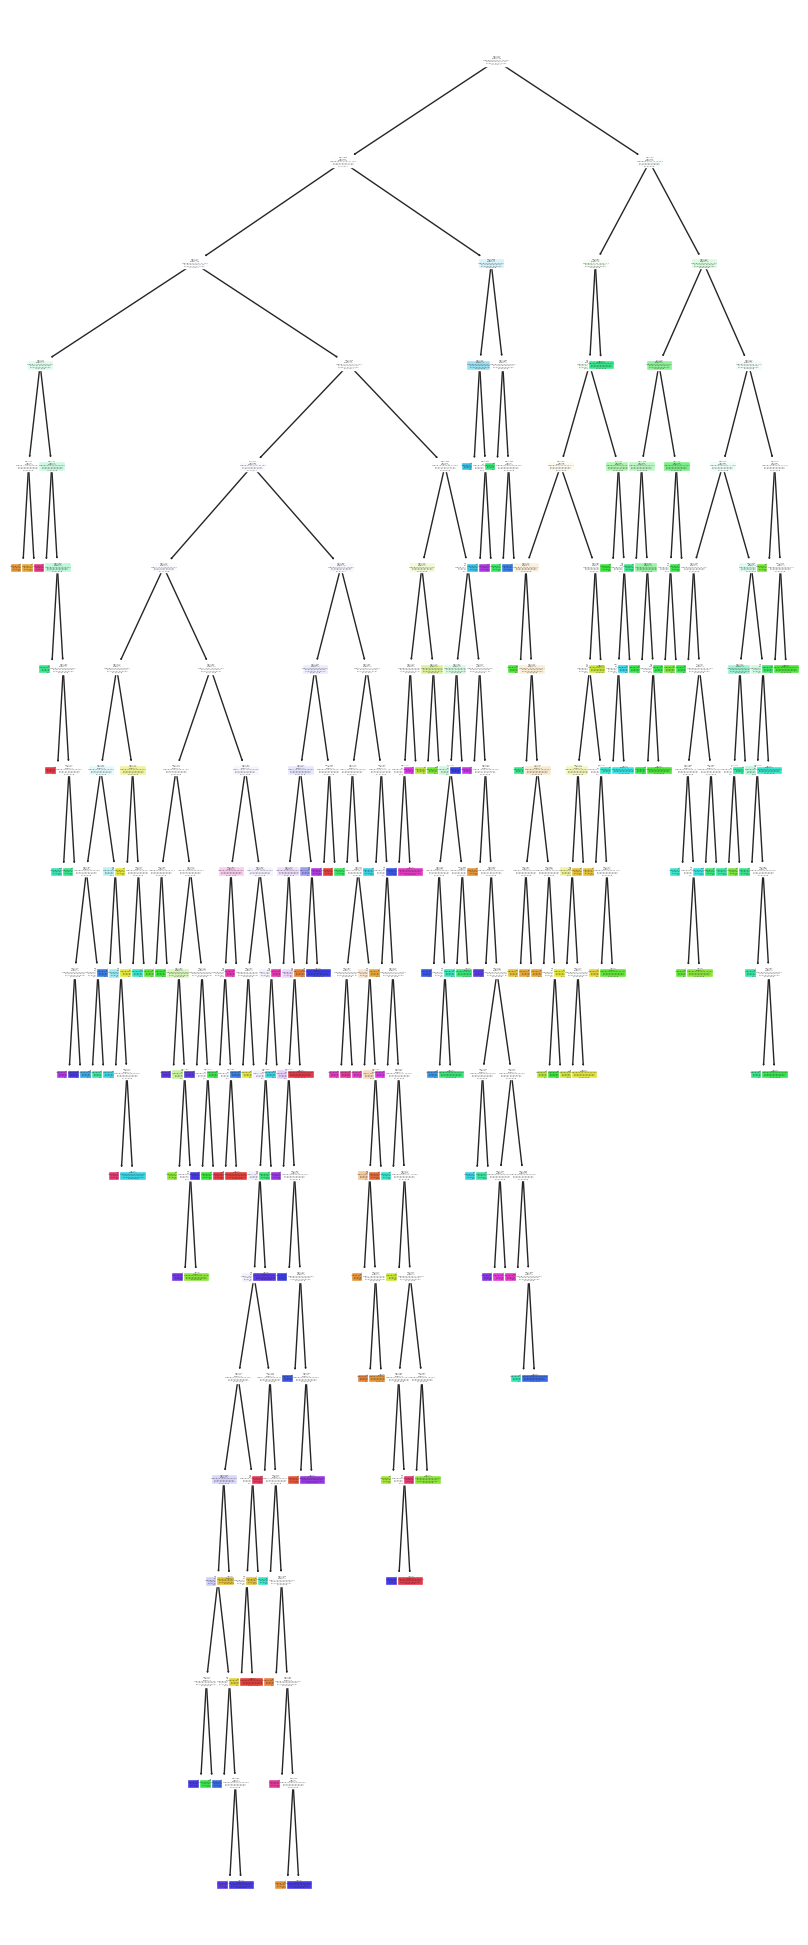

In [43]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,25))
plot_tree(model,filled=True);